In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegressionCV



[[ 0.12983214  0.21018119]
 [ 0.01580652  0.05815313]
 [ 0.06196086  0.14738377]
 [ 0.01012397  0.07080667]
 [ 0.08291027  0.01537734]
 [ 0.04923926 -0.04311917]
 [-0.04571677  0.16948974]
 [-0.09958606  0.0986602 ]
 [ 0.22175652 -0.00286559]
 [-0.00657178  0.30641287]]


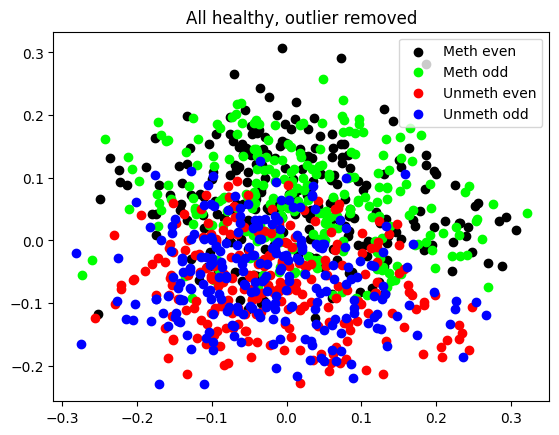

In [3]:
meth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_even_with_background.tsv", sep="\t")
meth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_odd_with_background.tsv", sep="\t")
unmeth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_even_with_background.tsv", sep="\t")
unmeth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_odd_with_background.tsv", sep="\t")


meth_even = meth_even.loc[meth_even["cancer"]=="Healthy"]
meth_odd = meth_odd.loc[meth_odd["cancer"]=="Healthy"]
unmeth_even = unmeth_even.loc[unmeth_even["cancer"]=="Healthy"]
unmeth_odd = unmeth_odd.loc[unmeth_odd["cancer"]=="Healthy"]


meth_even = meth_even.drop(306)
meth_odd = meth_odd.drop(306)
unmeth_even = unmeth_even.drop(306)
unmeth_odd = unmeth_odd.drop(306)

test = [meth_even, meth_odd, unmeth_even, unmeth_odd]
test = pd.concat(test) 
test = test.iloc[: , :-1]

def pca(data, n_comp): 
    idk = PCA(n_components= n_comp)
    X = idk.fit_transform(data)
    return X

test = pca(test, 16)




test2 = pca(test, 2)
print(test2[:][0:10])



plt.scatter(test2[0:243, 0], test2[0:243, 1], label = "Meth even", color = "Black")
plt.scatter(test2[243:2*243, 0], test2[243:243*2, 1],  label = "Meth odd", color = "Lime")
plt.scatter(test2[243*2:243*3, 0], test2[243*2:243*3, 1],  label = "Unmeth even", color = "Red")
plt.scatter(test2[243*3:243*4, 0], test2[243*3:243*4, 1],  label = "Unmeth odd" , color = "Blue")
plt.title("All healthy, outlier removed")
plt.legend()

In [73]:
training_data = [meth_even, unmeth_even]
training_data = pd.concat(training_data) 
training_data = training_data.iloc[: , :-1]
test_data = [meth_odd, unmeth_odd]
test_data = pd.concat(test_data) 
test_data = test_data.iloc[: , :-1]


train_fit = pca(training_data, 16)

train_targets = [0] * 243 + [1] * 243

test_fit =  pca(test_data, 16)

test_targets = [0] * 243 + [1] * 243

print(train_fit)


[[ 0.10626798  0.21932743  0.06802954 ... -0.01077725 -0.02164662
   0.00130588]
 [ 0.00985346  0.06199884 -0.00839081 ...  0.01841417 -0.0187098
  -0.00229804]
 [ 0.04558847  0.15120124 -0.13313544 ...  0.01049789  0.01825977
  -0.00718119]
 ...
 [-0.08341688 -0.07929726  0.02925726 ...  0.01523528  0.0160161
   0.00826023]
 [-0.14905242 -0.16190778  0.01498994 ...  0.01771042 -0.02254918
  -0.01832391]
 [ 0.05379225 -0.0187533  -0.02835218 ... -0.01494594 -0.04670025
   0.0116294 ]]


In [124]:

def pen_lasso(data, t): 
    model = LassoCV(random_state=123).fit(data, t)
    return [model.score(data, t), model.alpha_]

best_model = pen_lasso(train_fit, train_targets)

print(best_model)

test = Lasso(alpha=0.00001).fit(train_fit, train_targets)
print([test.score(train_fit, train_targets)])   


preds = test.predict(train_fit)

preds = preds.reshape(-1,1)


print(len(train_fit))
def classification(data, t): 
    model = LogisticRegressionCV(random_state=123).fit(data, t)
    return [model.score(data, t)]



LR_model = classification(preds, train_targets)

test_preds = test.predict(test_fit)


test_preds = test_preds.reshape(-1, 1)

test_idk = classification(test_preds, test_targets)

print(test_idk)


[0.9499644109324935, 3.4556648258671196e-05]
[0.9500726322761441]
486
[0.6069958847736625]


In [121]:
print(test_preds)
print(len(test_preds))

[[-6.63343613e-02]
 [-4.70461250e-01]
 [ 4.17189443e-01]
 [ 1.48569634e-01]
 [ 6.04641285e-01]
 [ 5.86815246e-01]
 [-2.23697035e-01]
 [ 4.24321973e-01]
 [ 8.73622869e-01]
 [ 2.04721528e-01]
 [ 3.55429612e-01]
 [ 6.42542352e-01]
 [ 5.67471469e-01]
 [ 2.78781189e-01]
 [ 3.40011880e-01]
 [ 5.26694749e-01]
 [ 9.76107791e-01]
 [ 1.24097005e+00]
 [ 5.20924975e-01]
 [ 4.54857304e-01]
 [-1.16736146e+00]
 [ 3.31934204e-01]
 [-2.55602956e-01]
 [-4.01559806e-01]
 [ 5.58790521e-01]
 [-2.40380076e-01]
 [ 4.79390837e-01]
 [ 3.99285082e-01]
 [ 6.55288072e-01]
 [ 1.01795393e+00]
 [ 4.22496856e-01]
 [ 4.52144141e-03]
 [ 1.08357273e+00]
 [ 7.04222969e-01]
 [ 1.43706899e-01]
 [ 1.87670405e-01]
 [ 1.02656381e+00]
 [-3.17952915e-02]
 [ 1.05554171e+00]
 [-1.44194170e-01]
 [ 5.68921613e-01]
 [ 8.12306165e-01]
 [ 6.22443285e-01]
 [ 6.19419973e-01]
 [ 6.23429817e-01]
 [ 3.32799582e-01]
 [ 2.89392178e-01]
 [ 1.51547848e-01]
 [ 6.08892266e-01]
 [ 3.28424030e-01]
 [ 9.22165988e-01]
 [ 1.07505686e+00]
 [ 8.3352644

In [120]:
print(preds)
print(len(preds))

[[ 5.84532573e-02]
 [ 3.57871554e-02]
 [-1.36477172e-01]
 [-4.63930713e-02]
 [ 4.39362530e-02]
 [ 2.12586690e-01]
 [-6.21554579e-02]
 [-4.21807330e-02]
 [ 3.07721015e-01]
 [-6.63778912e-02]
 [ 1.18771785e-01]
 [-2.22102636e-02]
 [-1.20912294e-01]
 [-3.18617677e-03]
 [ 5.99419391e-02]
 [ 3.02262745e-02]
 [ 1.29584259e-01]
 [-8.63214155e-02]
 [ 6.42088643e-02]
 [-8.64624911e-02]
 [-2.17535676e-01]
 [ 5.24325098e-02]
 [-6.48470915e-02]
 [-1.14476800e-01]
 [-5.51520468e-02]
 [ 2.40007812e-02]
 [ 1.88250913e-01]
 [-3.84170556e-03]
 [-9.54130206e-02]
 [ 5.50860587e-02]
 [ 1.46965853e-01]
 [-1.26705989e-01]
 [-3.77947343e-02]
 [ 9.45539414e-02]
 [-3.42965276e-02]
 [-2.35317489e-02]
 [-4.16974256e-02]
 [-1.77451758e-01]
 [ 2.45766574e-02]
 [-9.44722027e-03]
 [ 1.62871557e-01]
 [ 2.00947803e-01]
 [ 2.27017779e-01]
 [-6.64749233e-02]
 [ 2.43541628e-01]
 [-5.99340458e-02]
 [ 5.05687746e-02]
 [ 2.12781870e-02]
 [ 1.84279057e-01]
 [ 1.31388616e-01]
 [-6.23353157e-02]
 [ 2.37487798e-01]
 [-7.7810018

In [92]:


print(np.shape(train_fit))
print(np.shape(preds))
print(np.shape(train_targets))

(486, 16)
(486,)
(486,)
